Solved By: AHMED MOHAMED SROUR

## Throughout this Code, I will try to find out the answer to the following questions.

- How many Developers are writing code for opensource?
- How much money do the Developers get throughout the globe?
- How much are the Developers satisfied with their jobs throughout the globe?
- What is the relation between the age of a developer and his work?
- What are the social media sites that the developers use?
- Which is the most popular Operating System among the Developers?
- Why do most of the Developers update their RESUME frequently?
- What are the programming languages that the Developers had worked with and what languages do they want to use in future?
- Which type of work location is preferred by the Developers?

## **Importing**

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## **Load Data**

In [44]:
df=pd.read_csv('D:\ITI Data engineering intensive camp\Data Exploration\project\survey_results_public.csv')

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\AHMED\AppData\Local\Temp\ipykernel_23020\2976549028.py:1: SyntaxWarning: invalid escape sequence '\I'
  df=pd.read_csv('D:\ITI Data engineering intensive camp\Data Exploration\project\survey_results_public.csv')


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [46]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


## **Exploatroy Data Analysis & Visulazation**

**Now Let's Clean the Data** 
converting the columns to their required data types.

In [106]:
# Convert to Categorical
cat_cols = ['Hobbyist', 'OpenSourcer', 'Employment', 'Student']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [48]:
#Convert to Boolean
bool_cols = ['Hobbyist', 'Student', 'FizzBuzz']
for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': True, 'No': False})
        df[col] = df[col].astype('boolean')

In [49]:
# Convert Numeric Strings to Numbers
numeric_string_cols = ['YearsCode', 'YearsCodePro', 'Age1stCode']
for col in numeric_string_cols:
    if col in df.columns:
        # Handle special string cases
        df[col] = df[col].replace({
            'Less than 1 year': '0',
            'More than 50 years': '51'
        })
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [50]:
# Convert Compensation Columns
if 'ConvertedComp' in df.columns:
    df['ConvertedComp'] = pd.to_numeric(df['ConvertedComp'], errors='coerce')
    
if 'CompTotal' in df.columns:
    df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Convert Date 
if 'LastHireDate' in df.columns:
    df['LastHireDate'] = pd.to_datetime(df['LastHireDate'], errors='coerce')

C:\Users\AHMED\AppData\Local\Temp\ipykernel_23020\3386143044.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastHireDate'] = pd.to_datetime(df['LastHireDate'], errors='coerce')


In [51]:
# Convert String
multi_answer_cols = ['LanguageWorkedWith', 'DevType', 'DatabaseWorkedWith']
for col in multi_answer_cols:
    if col in df.columns:
        df[col] = df[col].astype('string')

In [52]:
print("\nAfter conversion:")
print(df.dtypes.value_counts())
# Check memory usage reduction
print("\nMemory usage before:", df.memory_usage(deep=True).sum() / 1024**2, "MB")


After conversion:
object            66
float64            8
string[python]     3
boolean            3
int64              1
category           1
category           1
category           1
datetime64[ns]     1
Name: count, dtype: int64

Memory usage before: 460.10223960876465 MB


**Breaking popular languages by developer type**

C:\Users\AHMED\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\AHMED\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


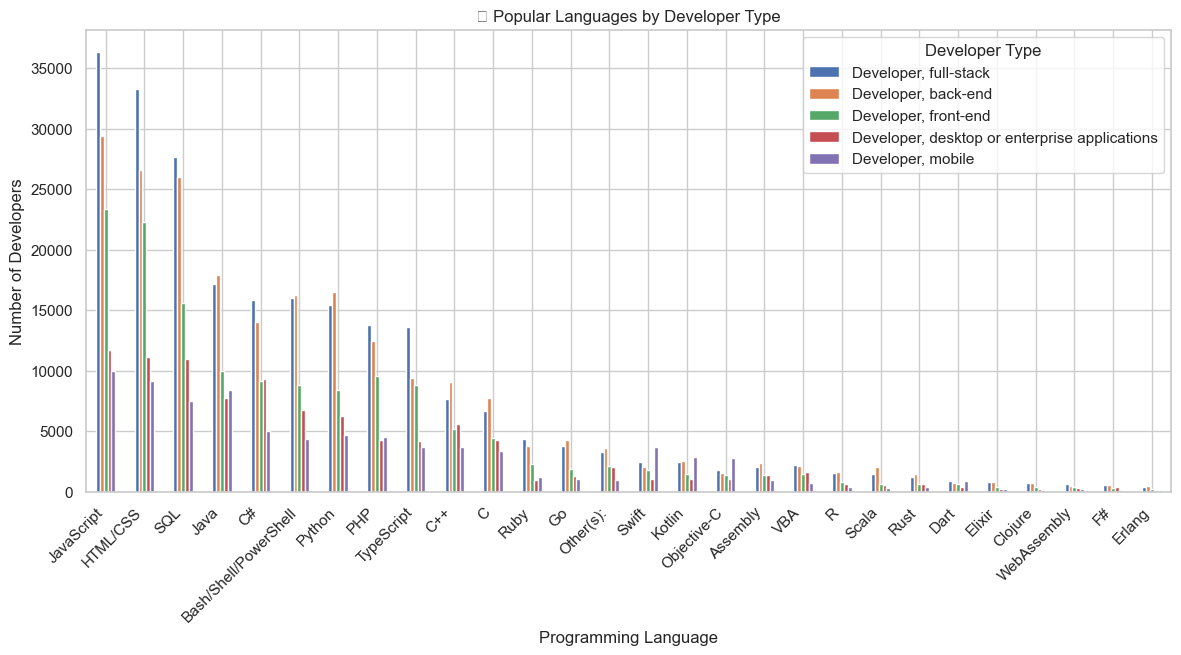

In [ ]:
# Drop rows where either column is missing
dev_lang_df = df[['DevType', 'LanguageWorkedWith']].dropna()
# Split both columns into lists
dev_lang_df['DevType'] = dev_lang_df['DevType'].str.split(';')
dev_lang_df['LanguageWorkedWith'] = dev_lang_df['LanguageWorkedWith'].str.split(';')
# Explode both columns
exploded = dev_lang_df.explode('DevType').explode('LanguageWorkedWith')
# Strip whitespaces
exploded['DevType'] = exploded['DevType'].str.strip()
exploded['LanguageWorkedWith'] = exploded['LanguageWorkedWith'].str.strip()
# Create crosstab
language_by_devtype = pd.crosstab(
    index=exploded['DevType'],
    columns=exploded['LanguageWorkedWith']
)
# Print part of the result
#print("Most used languages by developer type:")
#print(language_by_devtype.head())
# Get top 5 DevTypes by total language mentions
top_devtypes = language_by_devtype.sum(axis=1).sort_values(ascending=False).head(5).index
# Select only top developer types
subset = language_by_devtype.loc[top_devtypes]

#get top languages 
top_languages = subset.sum().sort_values(ascending=False).index
subset = subset[top_languages]

# Plot
subset.T.plot(kind='bar', figsize=(14, 6))
plt.title('💻 Popular Languages by Developer Type')
plt.xlabel('Programming Language')
plt.ylabel('Number of Developers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Developer Type')

**What are the programming languages that the Developers had worked with and what languages do they want to use in future?**

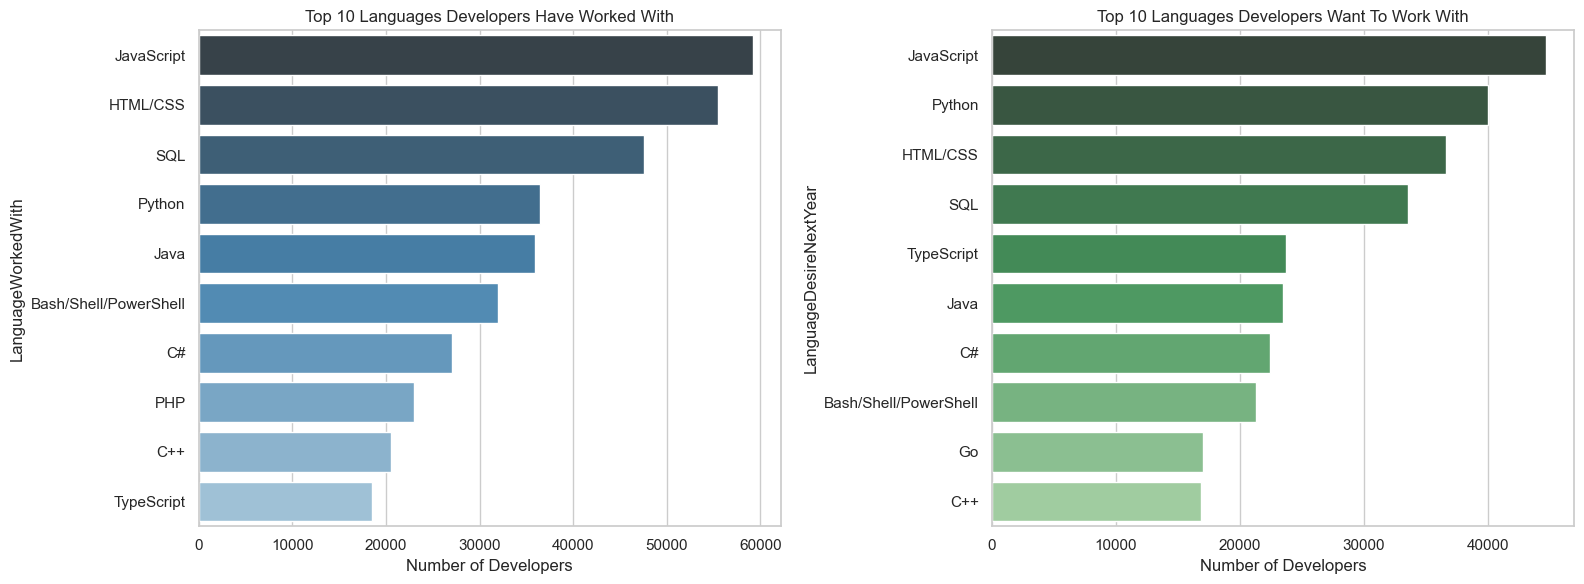

In [54]:
## Clean and explode both columns
langs_used = df['LanguageWorkedWith'].dropna().str.split(';').explode()
langs_wanted = df['LanguageDesireNextYear'].dropna().str.split(';').explode()
# Count values
langs_used_count = langs_used.value_counts()
langs_wanted_count = langs_wanted.value_counts()
# Create colors
blues = sns.color_palette('Blues_d', 10)[::-1]
greens = sns.color_palette('Greens_d', 10)[::-1]
# Plotting side by side
plt.figure(figsize=(16, 6))
# Left chart
plt.subplot(1, 2, 1)
sns.barplot(
    y=langs_used_count.head(10).index,
    x=langs_used_count.head(10).values,
    hue=langs_used_count.head(10).index,
    palette=blues
)
plt.title('Top 10 Languages Developers Have Worked With')
plt.xlabel('Number of Developers')
# Right chart
plt.subplot(1, 2, 2)
sns.barplot(
    y=langs_wanted_count.head(10).index,
    x=langs_wanted_count.head(10).values,
    hue=langs_wanted_count.head(10).index,
    palette=greens
)
plt.title('Top 10 Languages Developers Want To Work With')
plt.xlabel('Number of Developers')
# Adjust spacing
plt.subplots_adjust(wspace=0.6)
plt.tight_layout()
plt.show()

**How many Developers are writing code for opensource ?**

In [55]:
df['OpenSourcer'] = df['OpenSourcer'].fillna('Never')
print(df['OpenSourcer'].value_counts())

OpenSourcer
Never                                                 32295
Less than once per year                               24972
Less than once a month but more than once per year    20561
Once a month or more often                            11055
Name: count, dtype: int64


Text(0, 0.5, 'Contribution Frequency')

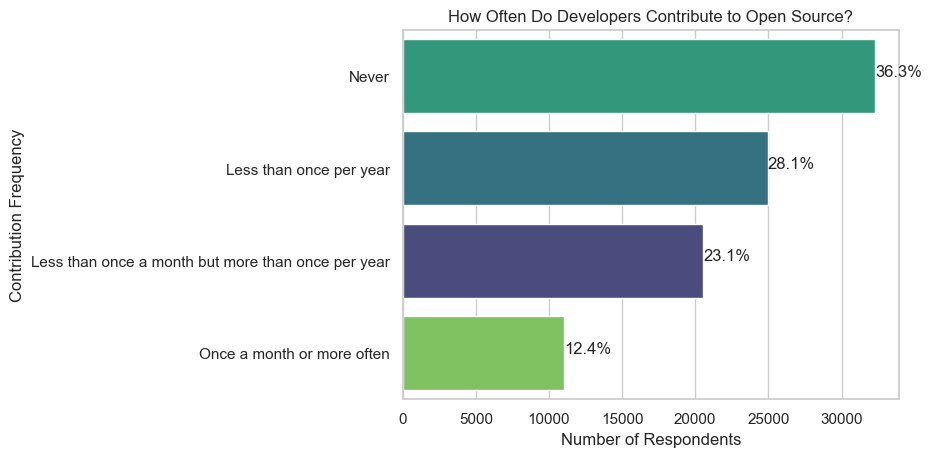

In [56]:
#doing bar chart
# style
sns.set_theme(style='whitegrid')
plt.Figure(figsize=(6,3))
#  countplot
ax=sns.countplot(
    y='OpenSourcer',
    data=df,
    order=df['OpenSourcer'].value_counts().index,
    hue='OpenSourcer',
    palette='viridis',
    legend=False,)
#percentages
total=len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x=p.get_x()+p.get_width()
    y=p.get_y()+p.get_height()/2
    ax.annotate(percentage, (x,y))
plt.title('How Often Do Developers Contribute to Open Source?')
plt.xlabel('Number of Respondents')
plt.ylabel('Contribution Frequency')

Text(0.5, 1.0, 'Open Source Contribution Frequency')

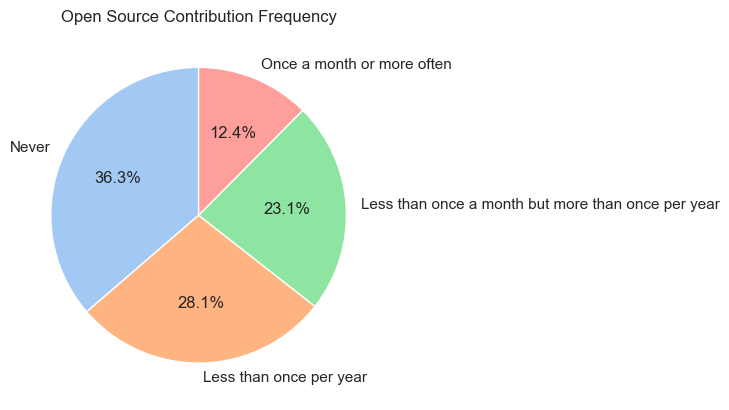

In [57]:
#pie chart plotting
#group the data 
open_source_counts = df['OpenSourcer'].value_counts()
#plotting
plt.Figure(figsize=(8,8))
plt.pie(open_source_counts, labels=open_source_counts.index, 
        autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('pastel'))
plt.title('Open Source Contribution Frequency')

**How much are the Developers satisfied with their jobs throughout the globe?**

Text(0, 0.5, 'Job Satisfaction Level')

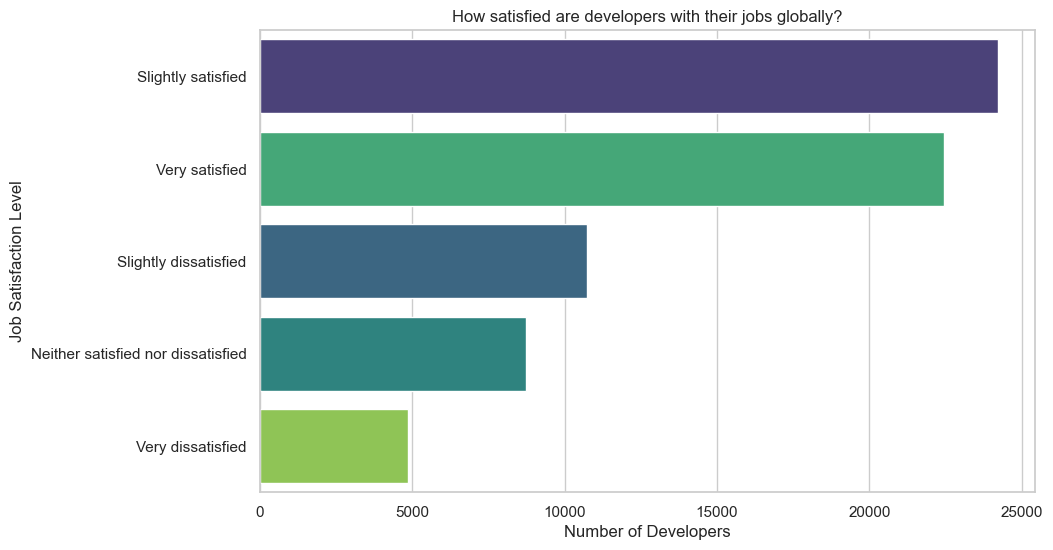

In [58]:
# Drop missing values
job_sat = df['JobSat'].dropna()
# Plot
plt.figure(figsize=(10, 6))
sns.countplot(
    y=job_sat,
    hue=job_sat,
    order=job_sat.value_counts().index, 
    palette="viridis",
    legend=False)
plt.title('How satisfied are developers with their jobs globally?')
plt.xlabel('Number of Developers')
plt.ylabel('Job Satisfaction Level')


**How much money do the Developers get throughout the globe?**

In [59]:
#copy the data for filtering
salary_df = df[['Country', 'ConvertedComp']].copy()
#Remove missing values 
salary_df = salary_df.dropna(subset=['ConvertedComp','Country'])
#remove outliers 
lower_bound=salary_df['ConvertedComp'].quantile(0.01)
Upper_bound=salary_df['ConvertedComp'].quantile(0.99)
salary_df = salary_df[
    (salary_df['ConvertedComp']>=lower_bound) & (salary_df['ConvertedComp']<=Upper_bound)]
#Display the number of salaries remaining for analysis.
print(f"Analyzing {len(salary_df):,} developer salaries worldwide")

Analyzing 55,265 developer salaries worldwide


Text(0.5, 1.0, 'Top 10 Developer Salaries by Country')

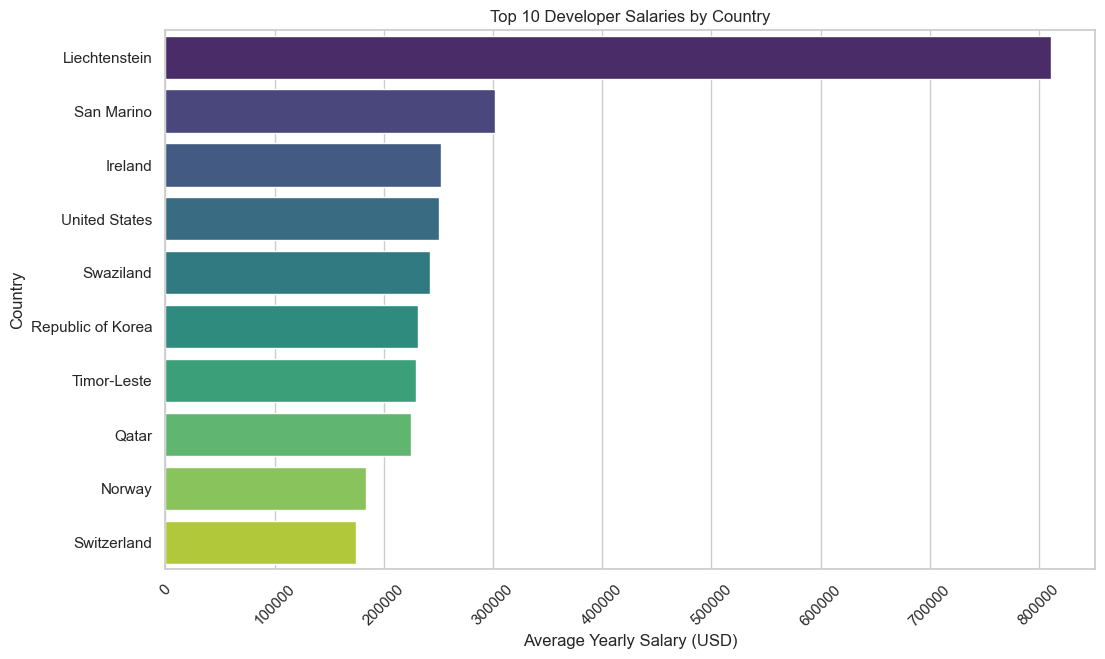

In [109]:
salary_df["Country"] = salary_df["Country"].astype('str')
#salary_df["Country"] = salary_df["Country"].astype('object')
# Calculate average salary per country
avg_salary = salary_df.groupby("Country")["ConvertedComp"].mean().sort_values(ascending=False)
# Display top 10 countries
top_countries = avg_salary.head(10)
#plotting   
sns.set_style("whitegrid")
#colors = sns.color_palette("viridis", len(top_countries))
plt.figure(figsize=(12, 7))
sns.barplot(x=top_countries.values,
            y=top_countries.index, 
            hue=top_countries.index,
            palette="viridis",
            legend=False)
plt.xticks(rotation=45)
plt.xlabel("Average Yearly Salary (USD)")
plt.ylabel("Country")
plt.title("Top 10 Developer Salaries by Country")

**What is the relation between the age of a developer and his work?**

Text(0, 0.5, 'Age')

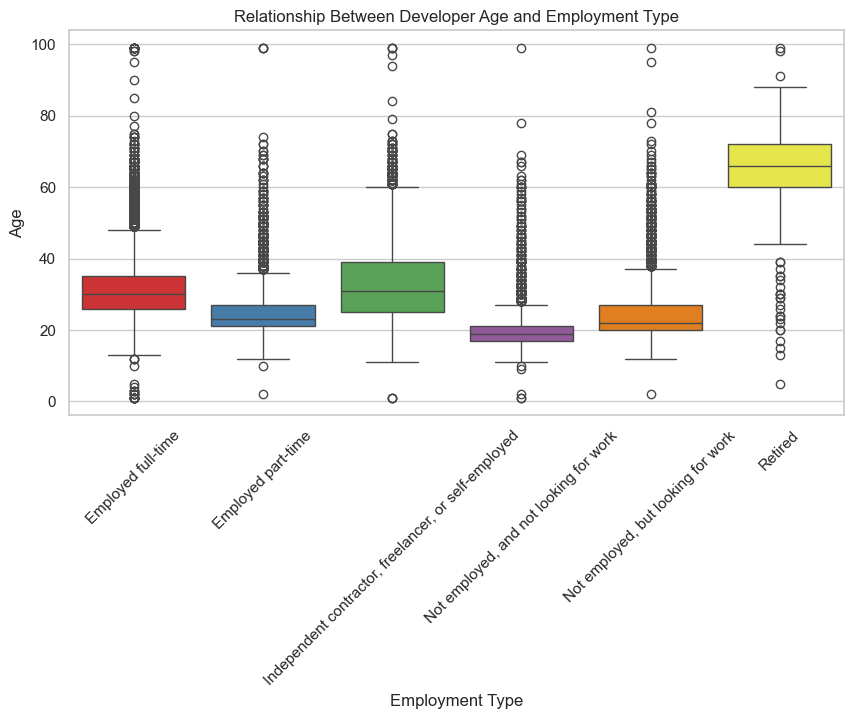

In [62]:
# Convert Age column to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
# Drop rows with missing Age or Employment
age_employment = df[['Age', 'Employment']].dropna()
# Plot
plt.figure(figsize=(10, 5))
sns.boxplot(
    x='Employment', 
    y='Age', 
    data=age_employment,
    hue='Employment',
    palette='Set1')
plt.xticks(rotation=45)
plt.title('Relationship Between Developer Age and Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Age')


**What are the social media sites that the developer uses?**

Text(0, 0.5, 'Platform')

C:\Users\AHMED\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24494 (\N{CJK UNIFIED IDEOGRAPH-5FAE}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\AHMED\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) Arial.
  func(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

C:\Users\AHMED\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24494 (\N{CJK UNIFIED IDEOGRAPH-5FAE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AHMED\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


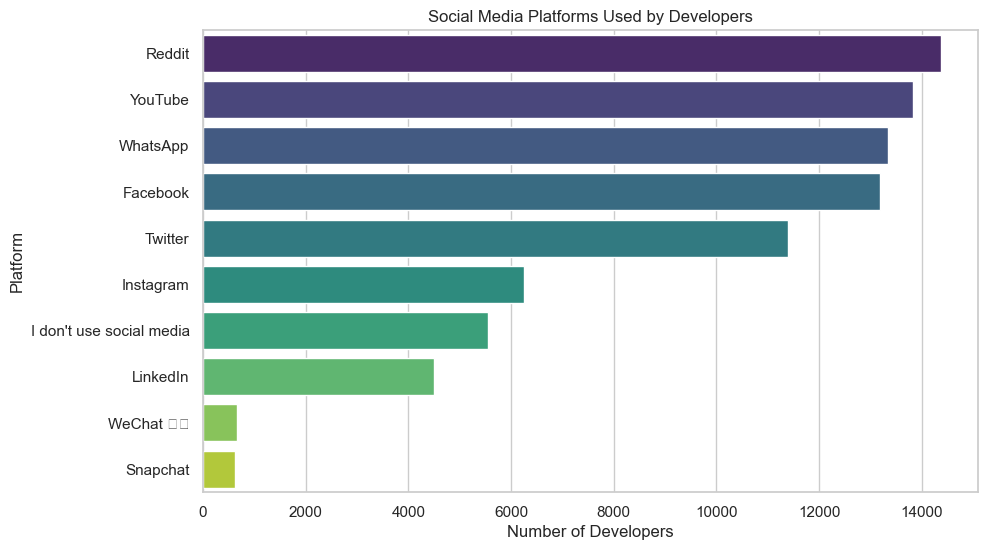

In [63]:
## Drop missing values
social_media = df['SocialMedia'].dropna()
#count and showing top 10
platform_counts = social_media.value_counts().head(10)
#plot
plt.figure(figsize=(10,5))
plt.figure(figsize=(10, 6))
sns.barplot(y=platform_counts.index, x=platform_counts.values,
            hue=platform_counts.index ,
            palette='viridis',
            legend=False
            )
plt.title('Social Media Platforms Used by Developers')
plt.xlabel('Number of Developers')
plt.ylabel('Platform')

**Which is the most popular Operating System among the Developers?**

Text(0, 0.5, 'Operating System')

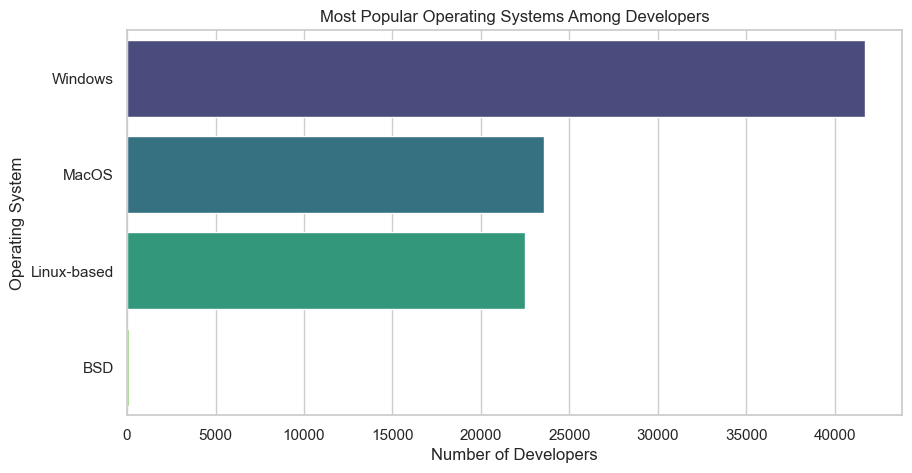

In [64]:
## Drop missing values
opsys = df['OpSys'].dropna()
#count
opsys_counts  = df['OpSys'].value_counts()
#plot
plt.figure(figsize=(10,5))
sns.barplot(y=opsys_counts.index ,
            x=opsys_counts.values,
            hue=opsys_counts.index,
            palette='viridis',
            legend=False)
plt.title('Most Popular Operating Systems Among Developers')
plt.xlabel('Number of Developers')
plt.ylabel('Operating System')


**Why do most of the Developers update their RESUME?**

Text(0, 0.5, 'Reason')

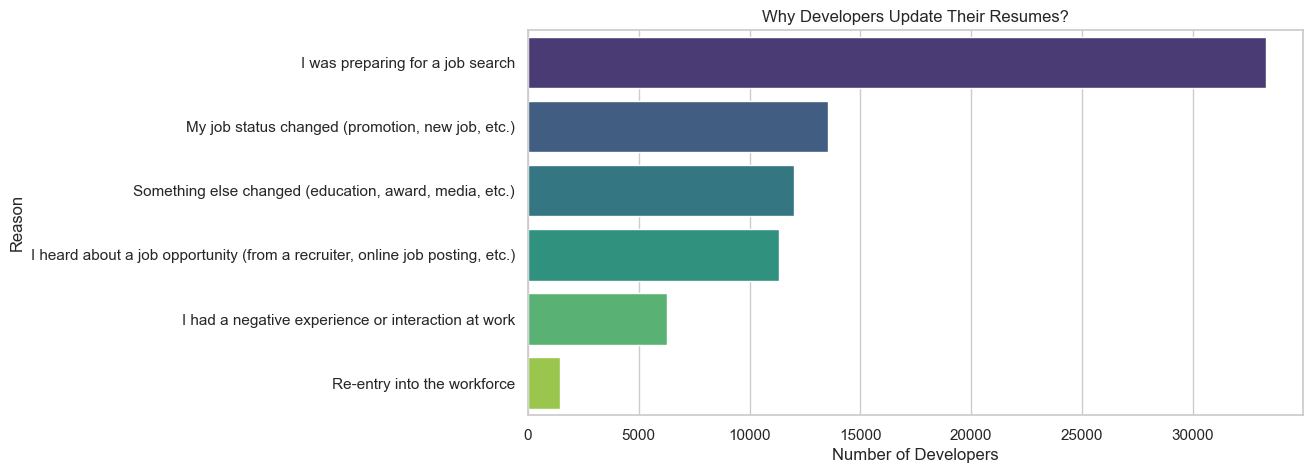

In [65]:
#### Drop missing values
reasons_df = df['ResumeUpdate'].dropna()
##count
reasons_df_count = df['ResumeUpdate'].value_counts()
##plot 
plt.figure(figsize=(10, 5))
sns.barplot(y=reasons_df_count.index,
            x=reasons_df_count.values ,
            hue=reasons_df_count.index,
            palette='viridis',
            legend=False)
plt.title("Why Developers Update Their Resumes?")
plt.xlabel("Number of Developers")
plt.ylabel("Reason")

**Which type of work location is preferred by the Developers?**

Text(0, 0.5, 'Work Location Preference')

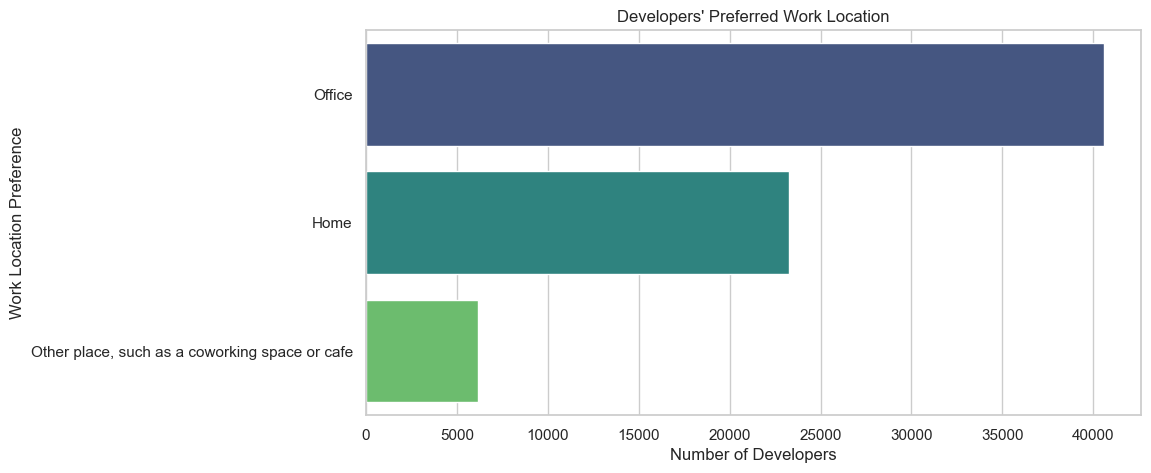

In [66]:
## Drop missing values
location_pref = df['WorkLoc'].dropna()
# Count
location_pref_count = df['WorkLoc'].value_counts()
# Plot the preferences
plt.figure(figsize=(10, 5))
sns.barplot(y=location_pref_count.index, 
            x=location_pref_count.values,
            hue=location_pref_count.index ,
            palette='viridis',
            legend=False)
plt.title('Developers\' Preferred Work Location')
plt.xlabel('Number of Developers')
plt.ylabel('Work Location Preference')
